<a href="https://colab.research.google.com/github/aleespejo12/SistemaDeControl2/blob/main/TP1_SC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Librerias

In [ ]:
!pip install -U control qtpy;
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
# import math
import matplotlib.pyplot as plt
import control as ctrl
import control as ct
from control.matlab import * #permite escribir igual que en Matlab
import cmath as cm
from scipy import signal
from scipy.signal import lti
from sympy import symbols, simplify

# Actividad practica N°1
Representación de sistemas y
controladores

#Caso de estudio 1. Sistema de dos variables de estado


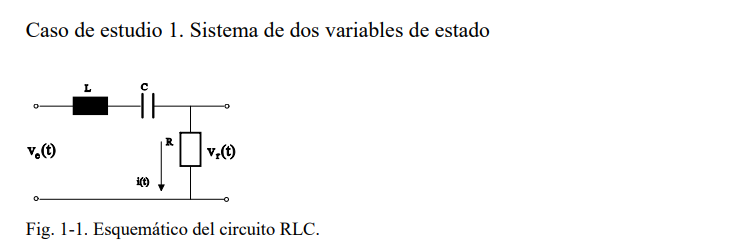

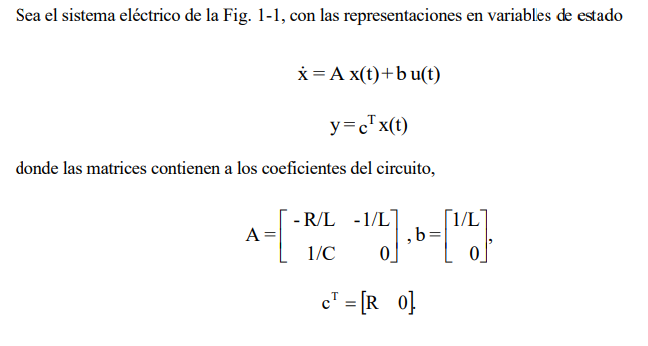

**CURVAS DEL CIRCUITO RLC PARA UNA ENTRADA DE 12V**

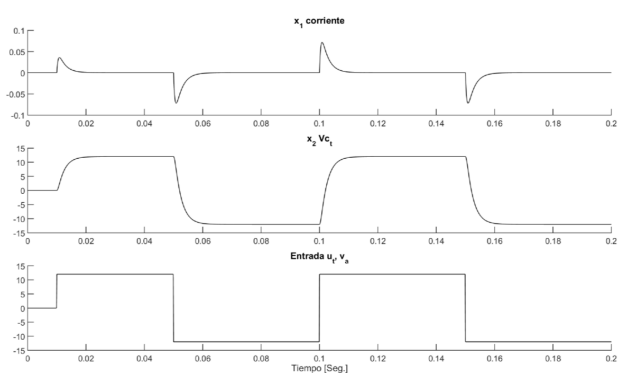

###ITEM [1]


Valores a Asignar

**R=47 Ohm**

**L=1 uHy**

**C=100 nF**

[1]
Obtener simulaciones que permitan estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V, que cada 1ms cambia de signo

Text(0.5, 1.0, 'Entrada 12V cada 1ms')

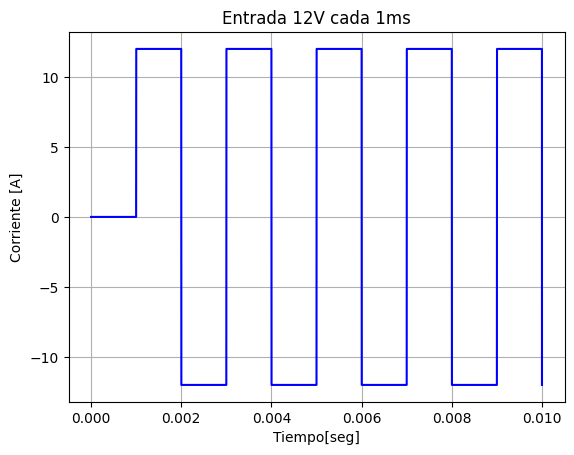

In [ ]:

t = np.linspace(0,0.01,10000)
u = np.piecewise(t,[t<=0.001,t>0.001],[lambda t: 0*t, lambda t: 12*signal.square(2*np.pi*500*(t-0.001))])
plt.plot(t,u,'b-')
plt.grid()
plt.ylabel('Corriente [A]')
plt.xlabel('Tiempo[seg]')
plt.title('Entrada 12V cada 1ms')

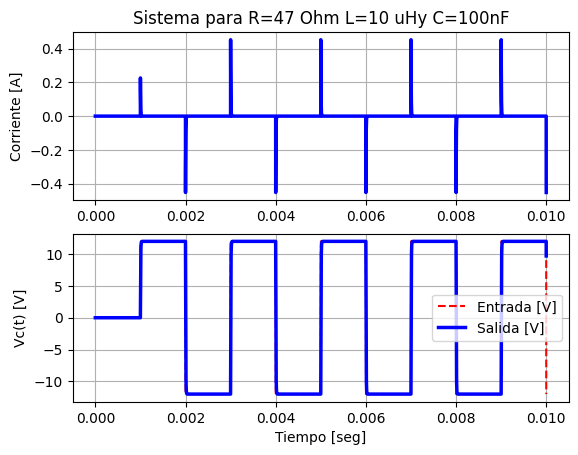

In [ ]:

R=47
L=0.000001
C=0.0000001

A=[[-R/L,-1/L],[1/C,0]]
B=[[1/L],[0]]
C1=[1,0]
C2=[0,1]
D = 0

sys1 = signal.StateSpace(A,B,C1,D)
sys2 = signal.StateSpace(A,B,C2,D)


t = np.linspace(0,0.01,10000)
u = np.piecewise(t,[t<=0.001,t>0.001],[lambda t: 0*t, lambda t: 12*signal.square(2*np.pi*500*(t-0.001))])

t1,y1,x1 = signal.lsim(sys1,u,t)
t2,y2,x2 = signal.lsim(sys2,u,t)

plt.subplot(211)
#plt.plot(t, u, 'r--')
plt.plot(t1, y1, 'b-', linewidth=2.5)
plt.grid()
plt.ylabel('Corriente [A]')
plt.title('Sistema para R=47 Ohm L=10 uHy C=100nF')

plt.subplot(212)
plt.plot(t, u, 'r--')
plt.plot(t2, y2, 'b-', linewidth=2.5)
plt.grid()
plt.xlabel('Tiempo [seg]')
plt.ylabel('Vc(t) [V]')
plt.legend(['Entrada [V]', 'Salida [V]'], loc='best')


###ITEM[2]

En el archivo Curvas_Medidas_RLC.xls (datos en la hoja 1 y etiquetas en la hoja 2)
están las series de datos que sirven para deducir los valores de R, L y C del circuito. Emplear el
método de la respuesta al escalón, tomando como salida la tensión en el capacitor

Index([0, '0.1', '0.2', '0.3'], dtype='object')
Pico maximo: 0.07176714792834286 t= [0.0010081]
Pico minimo: -0.07176714792834286 t= [0.00150815]


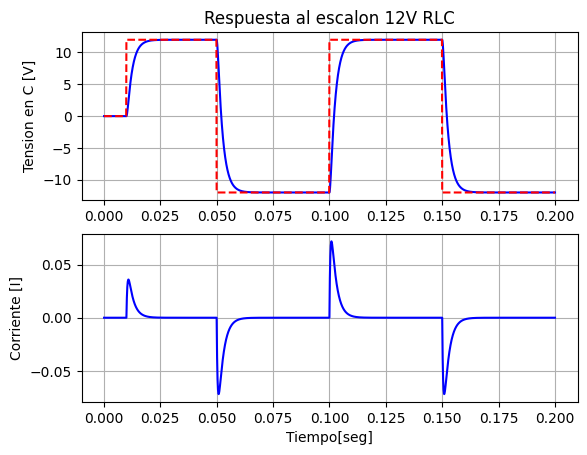

In [ ]:

datos = pd.read_excel("/content/drive/MyDrive/Curvas_Medidas_RLC_2024.xls", sheet_name="Hoja1")

print(datos.columns)
tiempo = datos[0]
Vc = datos['0.2']
Vt = datos['0.3']
I = datos['0.1']

plt.subplot(211)
plt.plot(tiempo,Vc,'b-')
plt.plot(tiempo,Vt,'r--')
plt.ylabel("Tension en C [V]")
plt.grid()
plt.title("Respuesta al escalon 12V RLC")

plt.subplot(212)
plt.plot(tiempo,I,'b-')
plt.xlabel("Tiempo[seg]")
plt.ylabel("Corriente [I]")
plt.grid()
print("Pico maximo:",max(I),"t=",t[np.where(I == max(I))])
print("Pico minimo:",min(I),"t=",t[np.where(I == min(I))])


Tendiendo los valores de la tabla y los graficos a partir de los valores, Buscamos obtener el tiempo de retardo entre que el escalon pasa de 0 a 12V y que la tension del capacitor comienza a tomar valores.

Como la tabla de valores ya nos brinda a simple vista los valores de tiempo necesitados procedemos a hacer la restas de tiempo de la muestra 102 con la 101 ya que se puede notar que es el retardo que buscamos obtener.


In [ ]:
t1=0.01 #tiempo en muestra 101
t2=0.0101 #tiempo en muestra 102
t_retardo = t2-t1
print("Retardo:",t_retardo)


Retardo: 9.99999999999994e-05


Para obtener la estimacion de la funcion de transferencia del sistema, procedemos a realizar el Metodo de Chen, para el cual necesitamos 3 puntos representativos  de la grafica de la carga del capacitor. Lo cual se utiliza un tiempo entre muestra y muestra de t_retardo*40.

Estimacion para FT Tension de Capacitor ante entrada al escalon 12V

In [ ]:
V1= Vc[250]
V2= Vc[350]
V3= Vc[450]

tk1=tiempo[250]
tk2=tiempo[350]
tk3=tiempo[450]


Elegimos un Cuarto(4) punto k en estado de regimen de la funcion para lograr estabilizar la ganancia.

Text(0.5, 1.0, 'Respuesta al escalon 12V RLC')

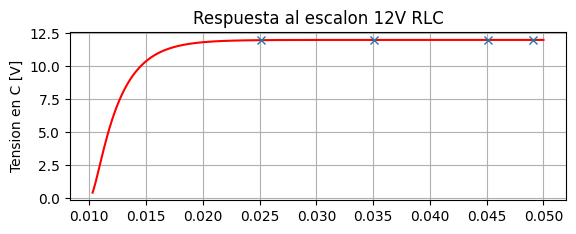

In [ ]:
V4=Vc[490]
tk4=tiempo[490]

plt.subplot(212)
plt.plot(tiempo[102:500],Vc[102:500],'r-')
plt.plot([tk1,tk2,tk3,tk4],[V1,V2,V3,V4],'x')
plt.ylabel("Tension en C [V]")
plt.grid()
plt.title("Respuesta al escalon 12V RLC")


El metodo de Chen esta diseñado para trabajar con respuestas al escalon unitarias por lo que debemos dividir el valor final de la funcion con el valor de la entrada en este caso de 12V

In [ ]:
Vin= Vt[490]
K=V4/Vin
print("K:",K)

K1=(V1/(K*Vin))-1
K2=(V2/(K*Vin))-1
K3=(V3/(K*Vin))-1
print("K1:",K1)
print("K2:",K3)
print("K3:",K2)

#Defino b

b= 4*(K1**3)*K3 - 3*(K1**2)*(K2**2) - 4*(K2**3) + (K3**2) + 6*K1*K2*K3
print("b:",b)


#Calculo Alfa1 Alfa2 y Beta

Alfa1=((K1*K2) + K3 - cm.sqrt(b))/(2*((K1**2)+K2))
Alfa2=((K1*K2) + K3 + cm.sqrt(b))/(2*((K1**2)+K2))

Beta=((2*K1**3)+(3*K1*K2)+ K3 - (cm.sqrt(b)))/(cm.sqrt(b))

print("Alfa1:",Alfa1)
print("Alfa2:",Alfa2)
print("Beta:",Beta)


K: 0.9999999641689178
K1: -0.001523303810097687
K2: -1.7585033418310303e-07
K3: -1.7921415235933047e-05
b: 2.539362503584332e-14
Alfa1: (0.009868121343613388-0j)
Alfa2: (-0.00034623505943613014-0j)
Beta: (-1.6339389784801983+0j)


Procedemos a Calcular las Constantes de Tiempo


In [ ]:

T1p=-((t1)/(cm.log(Alfa1)))
T2p=-((t1)/(cm.log(Alfa2)))
T3p= Beta*(T1p-T2p)+T1p
print("T1p:", T1p)
print("T2p:", T2p)
print("T3p:", T3p)

T1p: (0.002165230570696486+0j)
T2p: (0.0010861316772410065-0.0004282147539011647j)
T3p: (0.0004020488270447275-0.0006996767775594185j)


Plantemos la funcion de Chen con los parámetros calculados.

Como la funcion de Transferencia RLC No tien ceros, podemos despreciar el cero obtenido en la estimacion.

In [ ]:

Gnum=[T3p*K,K]
Gden=np.convolve([T1p,1],[T2p,1])

G=tf(Gnum,Gden)
print(G)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        0.000807 s + 1
------------------------------
2.528e-06 s^2 + 0.003279 s + 1



Grafico de Funcion estimada de Chen

/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1003: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/control/statesp.py:2161: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)


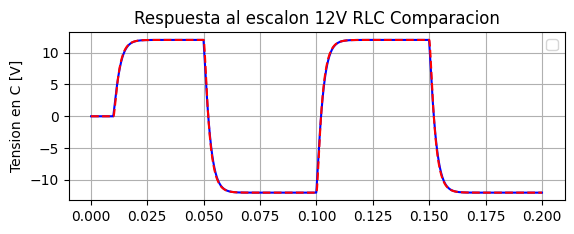

In [ ]:
ValoresG= lsim(G,Vt,tiempo)
yG=ValoresG[0]
tG=ValoresG[1]

plt.subplot(212)
plt.plot(tG,yG,'b-')
plt.plot(tiempo,Vc,'r--')
plt.ylabel("Tension en C [V]")
plt.grid()
plt.title("Respuesta al escalon 12V RLC Comparacion")
plt.legend("")

Podemos despejar las estimaciones de RLC del denominador de la funcion obtenida, ya que la funcion de RLC es s*(R*C)/(s^2*LC+s*RC+1)
vamos a suponer una resistencia R=47ohm, ya que contamos con 2 ecuaciones y 3 incognitas.


In [ ]:
Rp=250

LC=2.528*10**-6
RC=0.003279

Cp=RC/Rp
Lp=LC/Cp
print("R=",Rp)
print("L=",Lp)
print("C=",Cp)

R= 250
L= 0.19274168953949375
C= 1.3116e-05


Probando distintos valores de resistencia encontramos que 250 Ohm se acerca bastante a los niveles de corriente vistos en la tabla

###ITEM[3]

Una vez determinados los parámetros R, L y C, emplear la serie de corriente desde
0.05seg en adelante para validar el resultado superponiendo las gráficas.

Pico maximo: 0.03566540473420942 t= [0.00011501]
Pico minimo: -0.07133080919477153 t= [0.00051505]
Pico maximo: 0.07176714792834286 t= [0.0010081]
Pico minimo: -0.07176714792834286 t= [0.00150815]


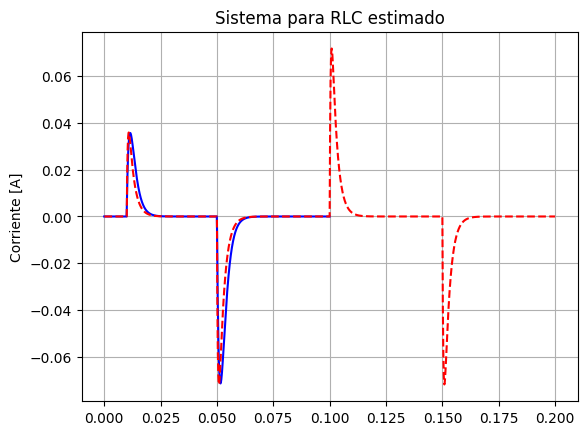

In [ ]:


Ap=[[-Rp/Lp,-1/Lp],[1/Cp,0]]
Bp=[[1/Lp],[0]]
C1p=[1,0]
Dp = 0

sys1p = signal.StateSpace(Ap,Bp,C1p,Dp)

tp = np.linspace(0,0.1,1000)
up = np.piecewise(tp, [(tp<=0.01), (tp>0.01) & (tp<=0.05), (tp>0.05)], [lambda tp: 0*tp, lambda tp: 0*tp+12, lambda tp: 0*tp-12])

t1p,y1p,x1p = signal.lsim(sys1p,up,tp)
print("Pico maximo:",max(y1p),"t=",t[np.where(y1p == max(y1p))])
print("Pico minimo:",min(y1p),"t=",t[np.where(y1p == min(y1p))])


plt.plot(t1p, y1p, 'b-', linewidth=1.5)
plt.plot(tiempo,I,'r--')
plt.grid()
plt.ylabel('Corriente [A]')
plt.title('Sistema para RLC estimado')

print("Pico maximo:",max(I),"t=",t[np.where(I == max(I))])
print("Pico minimo:",min(I),"t=",t[np.where(I == min(I))])

#Caso de estudio 2. Sistema de tres variables de estado


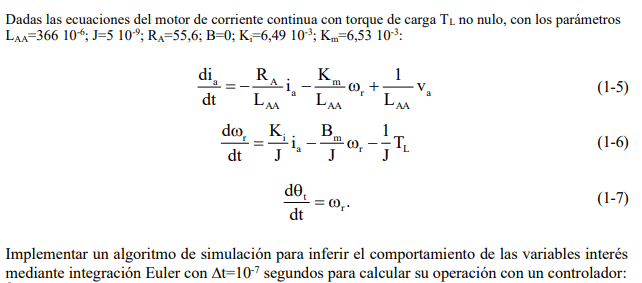

Para la Integración por Método de Euler se utilizó en este caso MATLAB.

Primero que todo se pasiva la entrada de Torque al motor y se definen las codiciones iniciales del sistema.

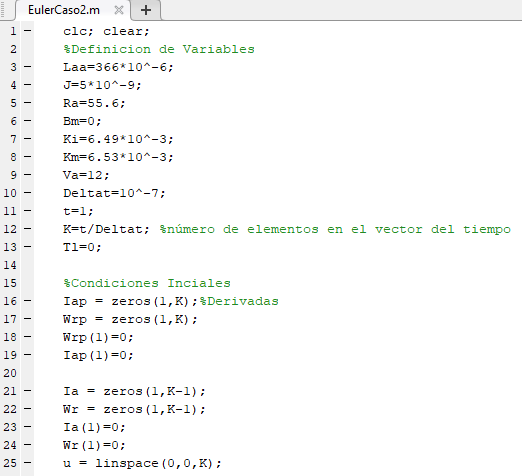

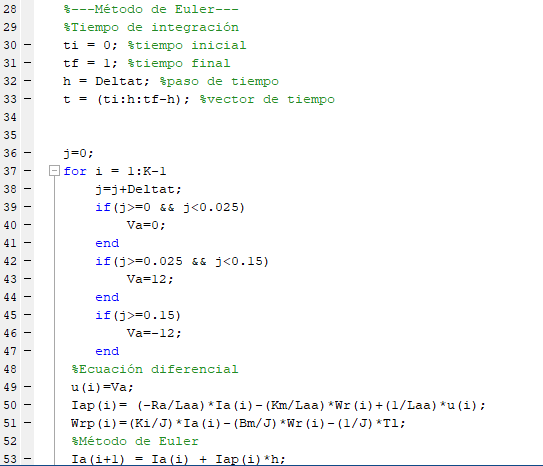

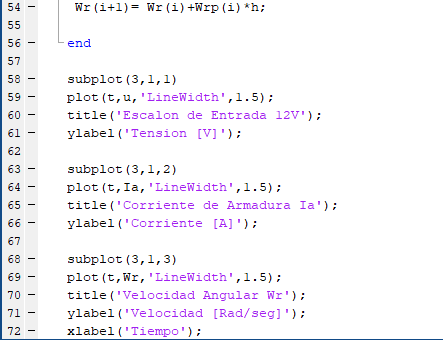

Obtenemos la representación gráfica del sistema ante una respuesta al escalón de 12V, en este caso se establecio un escalón de 125ms de duracion hasta cambiar de signo.

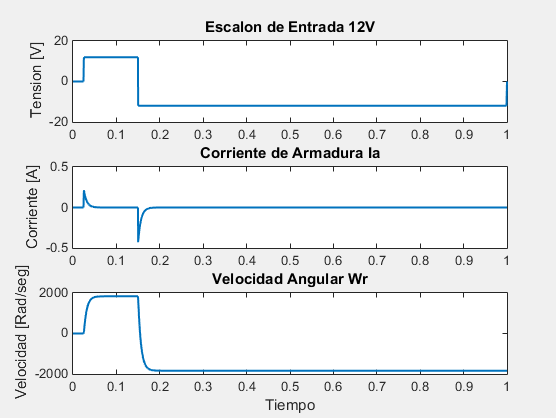

###Ítem [4]
Obtener el torque máximo que puede soportar el motor modelado mediante las Ecs. (1-5)
(1-6) y (1-7) cuando se lo alimenta con 12V, graficando para 5 segundos de tiempo la velocidad
angular y corriente ia para establecer su valor máximo como para dimensionar dispositivos
electrónicos.

Para obtener el Torque Maximo TL, se lo puede lograr obteniendo el valor de Corriente de Armadura Maxima Ia y despejando el torque de la funcion de Torque siguiente.

#TL=KM*Ia

Obtenemos el valor de Corriente Máxima a partir de la siguiente función que obtiene el Máximo de los valores conseguidos en el codigo anterior.

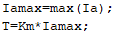

Logrando un Torque Maximo
#TLmax=0.0014

###ÍTEM [5]
A partir de las curvas de mediciones de las variables graficadas en la Fig. 1-3, se requiere
obtener el modelo del sistema considerando como entrada un escalón de 12V, como salida a la
velocidad angular, y al torque de carga TL aplicado una perturbación. En el archivo
Curvas_Medidas_Motor.xls están las mediciones, en la primer hoja los valores y en la segunda
los nombres. Se requiere obtener el modelo dinámico, para establecer las constantes del modelo
(1-5) (1-6).

Index([0, '0.1', '0.2', '0.3'], dtype='object')


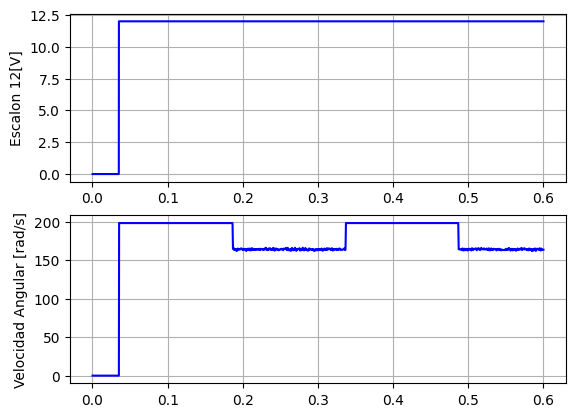

In [ ]:
datos1 = pd.read_excel("/content/drive/MyDrive/Curvas_Medidas_Motor_2024.xls", sheet_name="Hoja1")
print(datos.columns)
tiempo1 = datos1.iloc[:,0]
Wr1 = datos1.iloc[:,1]
Ia1 = datos1.iloc[:,2]
Vt1 = datos1.iloc[:,3]
Tl1 = datos1.iloc[:,4]

plt.subplot(211)
plt.plot(tiempo1,Vt1,'b-')
plt.ylabel("Escalon 12[V]")
plt.grid()

plt.subplot(212)
plt.plot(tiempo1,Wr1,'b-')
plt.ylabel("Velocidad Angular [rad/s]")
plt.grid()



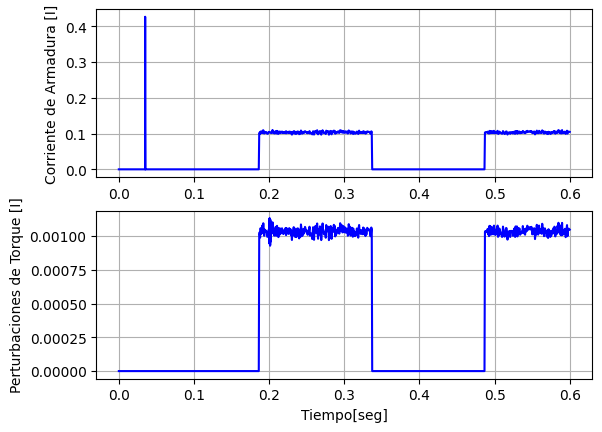

In [ ]:
plt.subplot(211)
plt.plot(tiempo1,Ia1,'b-')
plt.ylabel("Corriente de Armadura [I]")
plt.grid()

plt.subplot(212)
plt.plot(tiempo1,Tl1,'b-')
plt.xlabel("Tiempo[seg]")
plt.ylabel("Perturbaciones de Torque [I]")
plt.grid()

Nuevamente para obtener una función de transferencia utilizaremos el Método de Chen.

Text(0.5, 1.0, 'Respuesta al escalon 12V')

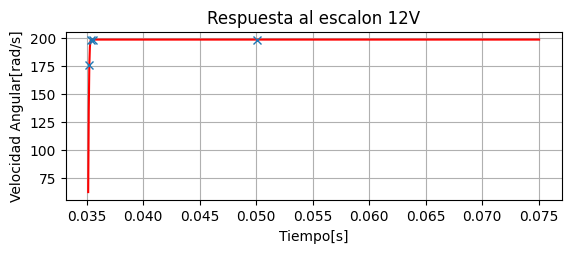

In [105]:
tm=tiempo1[703]-tiempo1[701]#tiempo donde comienza el escalon
V1= Wr1[703]
V2= Wr1[706]
V3= Wr1[709]

tk1=tiempo1[703]
tk2=tiempo1[706]
tk3=tiempo1[709]

V4=Wr1[1000]
tk4=tiempo1[1000]

plt.subplot(212)
plt.plot(tiempo1[701:2000],Wr1[701:2000],'r-')
plt.plot([tk1,tk2,tk3,tk4],[V1,V2,V3,V4],'x')
plt.ylabel("Velocidad Angular[rad/s]")
plt.xlabel("Tiempo[s]")
plt.grid()
plt.title("Respuesta al escalon 12V")

In [106]:
Vin= Vt1[1000]
K=V4/Vin
print("K:",K)

K1=(V1/(K*Vin))-1
K2=(V2/(K*Vin))-1
K3=(V3/(K*Vin))-1
print("K1:",K1)
print("K2:",K3)
print("K3:",K2)

#Defino b

b= 4*(K1**3)*K3 - 3*(K1**2)*(K2**2) - 4*(K2**3) + (K3**2) + 6*K1*K2*K3
print("b:",b)


#Calculo Alfa1 Alfa2 y Beta

Alfa1=((K1*K2) + K3 - cm.sqrt(b))/(2*((K1**2)+K2))
Alfa2=((K1*K2) + K3 + cm.sqrt(b))/(2*((K1**2)+K2))

Beta=((2*K1**3)+(3*K1*K2)+ K3 - (cm.sqrt(b)))/(cm.sqrt(b))

print("Alfa1:",Alfa1)
print("Alfa2:",Alfa2)
print("Beta:",Beta)

K: 16.52073352056807
K1: -0.11570218924970399
K2: 0.0002907608494009395
K3: 0.00028165036685834366
b: -1.7770279902716727e-06
Alfa1: (0.009443995665108538-0.04876313423244346j)
Alfa2: (0.009443995665108538+0.04876313423244346j)
Beta: (-1+2.1790681681387687j)


In [107]:
T1p=-((tm)/(cm.log(Alfa1)))
T2p=-((tm/(cm.log(Alfa2))))
T3p= Beta*(T1p-T2p)+T1p
print("T1p:", T1p)
print("T2p:", T2p)
print("T3p:", T3p)

T1p: (2.7501211414580402e-05-1.2635936499418109e-05j)
T2p: (2.7501211414580402e-05+1.2635936499418109e-05j)
T3p: (8.257034541559006e-05+1.2635936499418109e-05j)


In [108]:
Gnum=[T3p*K,K]
Gden=np.convolve([T1p,1],[T2p,1])

G=tf(Gnum,Gden)
print(G)

<TransferFunction>: sys[261]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


     0.00138 s + 16.52
----------------------------
9.16e-10 s^2 + 5.5e-05 s + 1



Graficamos la funcion Obtenida y la comparamos con el modelo real.

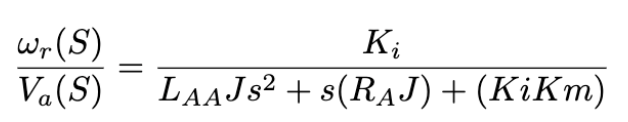

Ya que no contamos con Zeros los descartamos y dejamos el valor de ganancia Ki

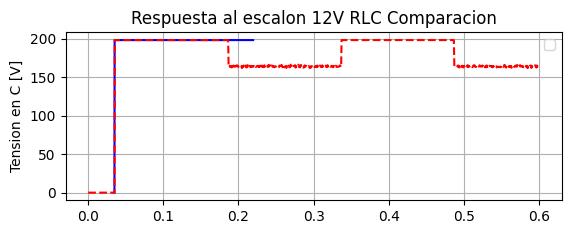

In [109]:
s = tf('s')
G = 16.52/ (9.16e-10*s**2 + 5.5e-05*s + 1)


t_m = np.linspace(0,0.1845,16680)

yG,tG = step(G*12,t_m)
delay=0.035035
tGdelay = tG+delay
plt.subplot(212)
plt.plot(tGdelay,yG,'b-')
plt.plot(tiempo1,Wr1,'r--')
plt.ylabel("Tension en C [V]")
plt.grid()
plt.title("Respuesta al escalon 12V RLC Comparacion")
plt.legend("")

Comparando la funcion obtenida con la funcion del modelo deseado para obtener los valores

In [113]:
Ki=16.52
LaaJ=9.16e-10
RaJ=5.5e-05
KiKm=1
Km=1/Ki


Analizando el pico de corriente maximo generado al inyectar el escalon al sistema podemos despejar la
####Ra = 12V/Imax

In [114]:
print("Pico maximo:",max(Ia1),"t=",t[np.where(Ia1 == max(Ia1))])

Pico maximo: 0.4265783661043107 t= [0.00070107]


In [116]:
Ra=Vin/max(Ia1)
J=RaJ/Ra
Laa=LaaJ/J
print("Ki=",Ki)
print("Laa=",Laa)
print("Ra=",Ra)
print("J=",J)
print("Km=",Km)

Ki= 16.52
Laa= 0.00046850605031778677
Ra= 28.130821798557065
J= 1.9551508446447576e-06
Km= 0.06053268765133172


###ÍTEM [6]
 Implementar un PID en tiempo discreto para que el ángulo del motor permanezca en una
referencia de 1 radian sometido al torque descripto en la Fig. 1-3. (Tip: partir de KP=0,1;
Ki=0,01; KD=5).